### Import Packages 

In [145]:
import numpy as np
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

### Load Data

In [33]:
DataSet_Path = r"C:\Users\asus\Desktop\MAHDI,Central\Programming\github\Repositories\AI\7- RFM\Train.xlsx"
Sales_DataSet = pd.read_excel(DataSet_Path)
Sales_DataSet = Sales_DataSet.iloc[:,:5] # ignore 'Suspicious' column
Sales_DataSet.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue
0,Rep10101,C21116,PR6112,182,1665
1,Rep10102,C21116,PR6112,182,1740
2,Rep10103,C21116,PR6253,101,1040
3,Rep10104,C21116,PR6253,283,4495
4,Rep10105,C21116,PR6294,108,1465


### Unique Value

In [69]:
unique_counts = PrettyTable()
unique_counts.field_names = ["Feature", "Unique Value"]

for column in Sales_DataSet.columns:
    count = Sales_DataSet[column].nunique()
    unique_counts.add_row([column, count])


print(unique_counts)    


+-----------------+--------------+
|     Feature     | Unique Value |
+-----------------+--------------+
|     ReportID    |    42582     |
|  SalesPersonID  |     992      |
|    ProductID    |     593      |
|     Quantity    |     6493     |
| TotalSalesValue |     7665     |
+-----------------+--------------+


### Sellers per Quantity
    - Total number of sales of a particular Seller
    - Ranking the Sellers, and show top 10 of them in bar chart

[24060951, 20897797, 11943852, 7731866, 7357299, 5711293, 5525254, 4628186, 4260588, 4161173]


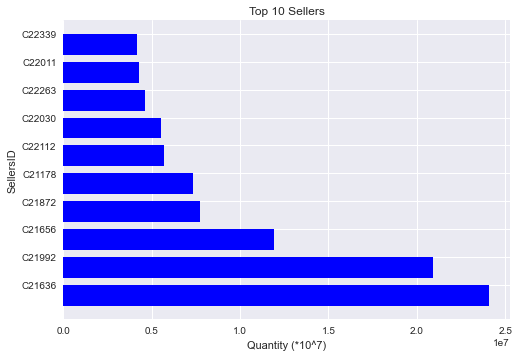

In [139]:

salesPerson_unique = list(Sales_DataSet.SalesPersonID.unique())

SalesPersonID_per_Quantity = Sales_DataSet[["Quantity", "SalesPersonID"]]


QuantitySum_unique_forEachSalesPerson = []
for Person in salesPerson_unique:
        
    ListOfQuantityOfPerson = SalesPersonID_per_Quantity["Quantity"][(SalesPersonID_per_Quantity["SalesPersonID"]==Person)]
    
    QuantitySum_unique_forEachSalesPerson.append(sum(ListOfQuantityOfPerson))
    
    
    
# Total number of sales of a particular Seller
SellerID = "C21636" 
UniqueSalesPersonID_per_SumOfQuantity = dict(zip(salesPerson_unique, QuantitySum_unique_forEachSalesPerson))
print(UniqueSalesPersonID_per_SumOfQuantity[SellerID])




# Ranking of Sellers
Top10_Sellers = sorted(UniqueSalesPersonID_per_SumOfQuantity.items(), key=lambda user:user[1], reverse=True)[:10]
keys, values = [ i for i, j in Top10_Sellers], [ j for i, j in Top10_Sellers]

fig, ax = plt.subplots()    
plt.style.use('seaborn')
width = 0.75 
ind = np.arange(len(values))
ax.barh(ind, values, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(keys, minor=False)
plt.title('Top 10 Sellers')
plt.xlabel('Quantity (*10^7)')
plt.ylabel('Sellers ID')
plt.show()



### 

### Most Popular Products

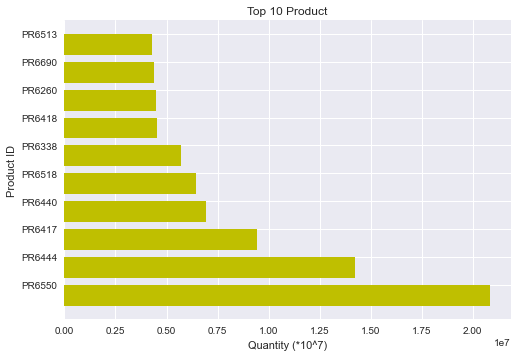

In [156]:
ProductID_unique = list(Sales_DataSet.ProductID.unique())

ProductID_per_Quantity = Sales_DataSet[["Quantity", "ProductID"]]


QuantitySum_unique_forEachProductID = []
for Product in ProductID_unique:
        
    ListOfQuantityOfProduct = ProductID_per_Quantity["Quantity"][(ProductID_per_Quantity["ProductID"]==Product)]
    
    QuantitySum_unique_forEachProductID.append(sum(ListOfQuantityOfProduct))
        
    
# Total number of sales of a particular Product
ProductID = "PR6112" 
UniqueProduct_per_SumOfQuantity = dict(zip(ProductID_unique, QuantitySum_unique_forEachProductID))
# print(UniqueProduct_per_SumOfQuantity[ProductID])



# Ranking of Sellers
Top10_Product = sorted(UniqueProduct_per_SumOfQuantity.items(), key=lambda product:product[1], reverse=True)[:10]
keys, values = [ i for i, j in Top10_Product], [ j for i, j in Top10_Product]

fig, ax = plt.subplots()    
plt.style.use('seaborn')
width = 0.75 
ind = np.arange(len(values))
ax.barh(ind, values, width, color="y")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(keys, minor=False)
plt.title('Top 10 Product')
plt.xlabel('Quantity (*10^7)')
plt.ylabel('Product ID')
plt.show()



### Most Trend Buying Number (NOT COMPLITED)

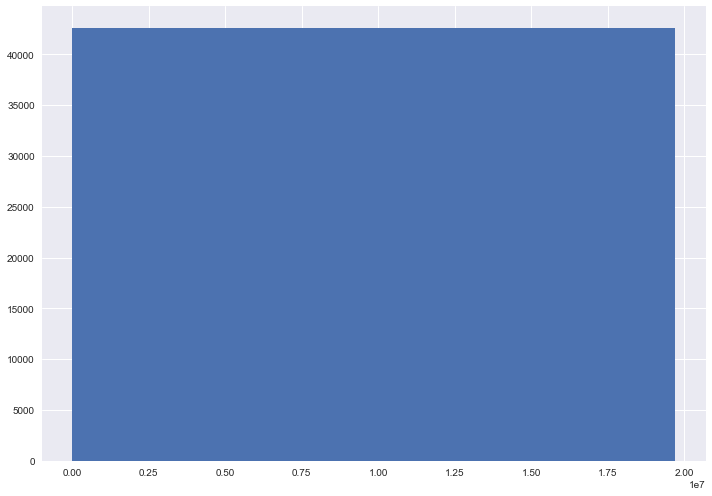

In [147]:

# y = .8 ** x + np.random.randn(10000) + 25

fig, axs = plt.subplots(1, 1,
						figsize =(10, 7),
						tight_layout = True)

n_bins = 1
axs.hist(Sales_DataSet["Quantity"], bins = n_bins)

# Show plot
plt.show()


### Number of product selling by seller

10


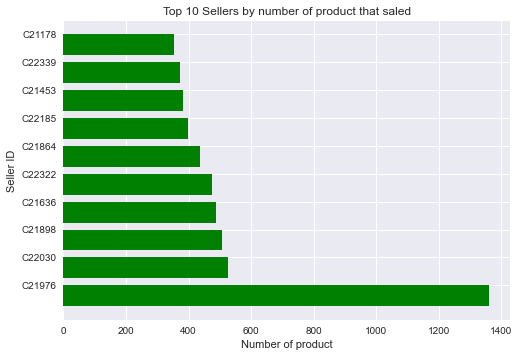

In [153]:
salesPerson_unique = list(Sales_DataSet.SalesPersonID.unique())

QuantityCount_unique_forEachSalesPerson = []
for Person in salesPerson_unique:
        
    ListOfQuantityCountOfPerson = SalesPersonID_per_Quantity["Quantity"][(SalesPersonID_per_Quantity["SalesPersonID"]==Person)]
    
    QuantityCount_unique_forEachSalesPerson.append(len(ListOfQuantityCountOfPerson))
    

# print(QuantityCount_unique_forEachSalesPerson)






# Number of product selling by particular seller
SellerID = "C21116" 
UniqueSalesPersonID_per_CountOfQuantity = dict(zip(salesPerson_unique, QuantityCount_unique_forEachSalesPerson))
print(UniqueSalesPersonID_per_CountOfQuantity[SellerID])




# Ranking of Sellers by number of product that saled
Top10_Sellers = sorted(UniqueSalesPersonID_per_CountOfQuantity.items(), key=lambda user:user[1], reverse=True)[:10]
keys, values = [ i for i, j in Top10_Sellers], [ j for i, j in Top10_Sellers]

fig, ax = plt.subplots()    
plt.style.use('seaborn')
width = 0.75 
ind = np.arange(len(values))
ax.barh(ind, values, width, color="Green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(keys, minor=False)
plt.title('Top 10 Sellers by number of product that saled')
plt.xlabel('Number of product')
plt.ylabel('Seller ID')
plt.show()
